# Experimenting with Kernels and Convolution

<img src="./jupyterimgs/1_d_convo.gif" width="50%"></img>

So kernels are basically matrices and Convolution is the process of transforming the image/vector/array using the matrix.
Wait.What ?

Yeah that's it. Any matrix can basically be a kernel. Might not be a useful one but kernel none the less.
There are few kernels that have been widely used for specific purposes

How convolution process uses the kernel can be seen in this gif

<img src="./jupyterimgs/convolution.gif" width="20%"></img>


To be really technical what we saw above was actually cross-correlation. This minomer has stuck for a long time now. But good thing is that there is only a very small but subtle difference between the two operations.

In Convolution we flip the kernel before tranforming. So if kernel was [1,2,3] in convolution it would become [3,2,1]

A good explaination is [here](https://towardsdatascience.com/convolution-vs-correlation-af868b6b4fb5)

The bottom most (light blue) matrix is the the image here. The darker grey matrix is the kernel and the process of moving it around and producing the green matrix is convolution.

[Photo Courtsey](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

The above link also gives a good theoritical/intuitive explaination of convolution. In this article we implement 1-d convolution and then move on to 2-d images.

In [12]:
import numpy as np
import pandas as pd

In [13]:
from plotnine import *

### Generating Data

#### Generating Image data
Lets first look into 1-d filters and convolution.

lets generate a 1-d image that is darker in the middle and lighter towards the ends.
One way to do that is use the equation for a circle

$y^2$ = $x^2$ + $r^2$
where y would be the intensity and x along the dimension.

Based on the number of points (n) we want to generate we can set *r* to n/2

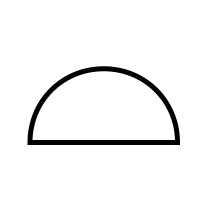</img>

In [14]:
n = 50
f = np.array([(i-n/2)**2 + (n/2)**2 for i in range(0,n)])
f = (f-f.mean())/f.std()

One thing that we have done with 
<code>
    f = (f-f.mean())/f.std()
</code>
is that we have normalized our data so that everything would lie within -3 and 3. Just for convenience.

Now that we have generated the array let's visualize it. For people familiar with ggplot, the following code should be easy to follow. What we are doing here is essentially generating a heatmap ,albiet with only one row.

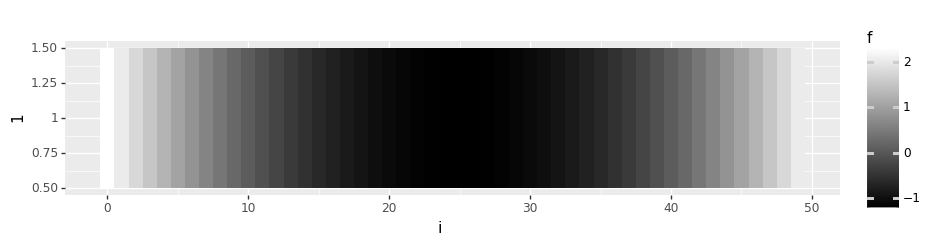

<ggplot: (127489272412)>

In [15]:
(
    ggplot(pd.DataFrame({"f" : f , "i" : np.arange(0,f.shape[0])}), aes(x="i" , fill="f" , y=1))
    + geom_tile()
     + scale_fill_gradient(limits=(f.min(),f.max()) , low="black" , high="white")
    + theme(figure_size=(10,2))
)

Another way to visualize the same information would be to simply use a Bar Chart

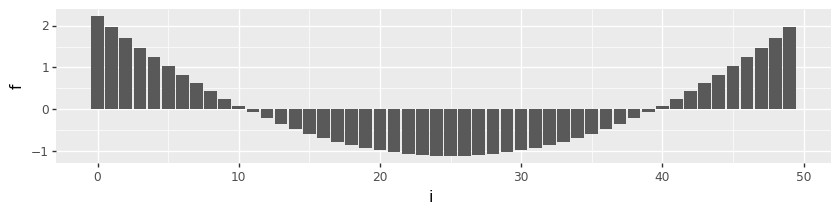

<ggplot: (127491523925)>

In [16]:
(
    ggplot(pd.DataFrame({"f" : f , "i" : np.arange(0,f.shape[0])}), aes(x="i" , y="f"))
    + geom_col()
    + theme(figure_size=(10,2))
)

#### Generating Kernel

Let's now generate a 1-d kernal that has 5 elements.
For example [4,6,8,6,2]

In [17]:
m = 5
g = np.random.random(m)

Same as above lets visualize a heatmap. As you would notice it has only 5 columns as that's the parameter we have chosen.

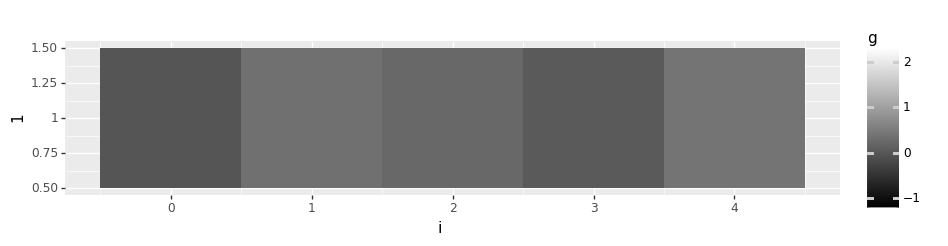

<ggplot: (127491478918)>

In [18]:
(
    ggplot(pd.DataFrame({"g" : g , "i" : np.arange(0,g.shape[0])}),  aes(x="i" , fill="g" , y=1))
    + geom_tile()
     + scale_fill_gradient(limits=(f.min(),f.max()) , low="black" , high="white")
    + theme(figure_size=(10,2))
)

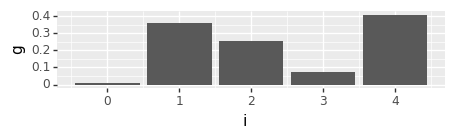

<ggplot: (-9223371909362126574)>

In [22]:
(
    ggplot(pd.DataFrame({"g" : g , "i" : np.arange(0,g.shape[0])}), aes(x="i" , y="g"))
    + geom_col()
     + theme(figure_size=(5,1))
)

### Let's Visualize Convolution!

Now we have our data in *f* and our kernel in *g*. Let's get the fun part and see how convolution actually works.
Below we generate a visualization moving from the left of *f* to the right and see the final outcome.

In [8]:
import math

In [9]:
ik = 0
convres = np.zeros(f.shape[0])
def plot(ik):
    m = g.shape[0]
    m2 = math.floor(m/2)
    convres[ik] = np.mean(np.multiply(f[ik-m2:ik+m2+1], g))
    return (
        ggplot(pd.DataFrame({"f" : f , "conv" : convres}).reset_index().melt(id_vars="index") , aes(y="variable" , x= "index",fill="value"))
        + geom_tile()
        + geom_vline(xintercept=ik-m2 , color="red")
        + geom_vline(xintercept=ik+m2, color="red")
        + geom_vline(xintercept=ik, color="green")
        + scale_fill_gradient(limits=(f.min(),f.max()) , low="black" , high="white")
    )

The important bit in the above function is

<code>
    convres[ik] = np.mean(np.multiply(f[ik-m2:ik+m2+1], g))
</code>

here we are doing the convolution operation by 
1. Subsetting the 1-d image to 1x5 region around the pixel position *ik* <code>f[ik-m2:ik+m2+1] </code>
2. Taking the weighted average.

for example f[...] is [4,5,6,7,8] and the kernel is [0.5 , 0, 0, 1, 0.5]
then the output will be <code>(4 * 0.5) + (5 * 0) + (6 * 0) + (7 * 1) + (8 * 0.5) = 13</code>

In [10]:
from plotnine.animation import PlotnineAnimation
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plots = (plot(k) for k in np.arange(math.floor(g.shape[0]/2), f.shape[0] - g.shape[0], 1))
ani = PlotnineAnimation(plots, interval=100, repeat_delay=500)

In [12]:
from IPython.display import HTML
HTML(ani.to_jshtml())

What you can observe above is that the kernel that we generated is doing some sort of smoothing operation where everything is sort of being grayed out. This is because convolution is averaging the nearby pixels and therefore the whiter ones become darker and black ones become lighter.

## 2-D convolution.

Lets move to 2-d convolution
Below are examples of some 3x3 kernels. Lets import a 2-d image and then see the results of these different kernels on the images.

<div class="row">
  <div class="col-md-6">
    <table class="table">
      <thead>
        <tr>
          <th> Purpose </th>
          <th> Kernel </th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <th> Edge Detection </th>
          <th> \begin{bmatrix}
            -1 & -1 & -1 \\
            -1 & \ \ 8 & -1 \\
            -1 & -1 & -1
            \end{bmatrix} </th>
        </tr>
        <tr>
          <th> Sharpen Images </th>
          <th>
            \begin{bmatrix}
            \ \ 0 & -1 & \ \ 0 \\
            -1 & \ \ 5 & -1 \\
            \ \ 0 & -1 & \ \ 0
            \end{bmatrix}
          </th>
        </tr>
        <tr>
          <th> Sharpen Images </th>
          <th>
            \begin{bmatrix}\ \ 1&\ \ 2&\ \ 1\\\ \ 2&\ \ 4&\ \ 2\\\ \ 1&\ \ 2&\ \ 1\end{bmatrix}
          </th>
        </tr>
      </tbody>
    </table>
  </div>
</div>

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as im

### Loading the Image

In [27]:
img=im.imread('./images/dtu.png')

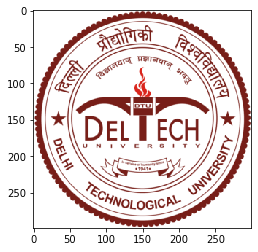

In [28]:
plt.imshow(img)

In [29]:
img.shape

(299, 300, 4)

As we see above the image shape is 299x300x4. It has 299 rows and 300 columns and 4 channels. Each channel is for red, green, blue and opacity respectively.

### Resizing the Image

In [30]:
import cv2
img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

We convert the color image to grey scale by combining the red, green and blue channels of the image. This is done for ease of demonstration. Same principals can be applied to each channel individually and the results can then be combined.

To combine the channels we use <code>np.mean(img[:,:,0:3], axis=2) </code>. Basically for each pixel doing val = (r + g + b)/3

We leave the 4th channel, the alpha or opacity channel from our calculation.

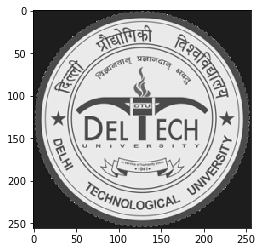

In [31]:
plt.imshow(np.mean(img[:,:,0:3], axis=2) , cmap='gray')

In [32]:
img_grey =np.mean(img[:,:,0:3], axis=2)

In [33]:
img_grey.shape

(256, 256)

In [34]:
from scipy import signal

We use the convolve2d function from Scipy.signal to do our processing. 

The function basically takes the image and the kernel as the input. We have used our *g* kernel from before but made it 2-d by stacking. <code>np.array([g,g])</code>

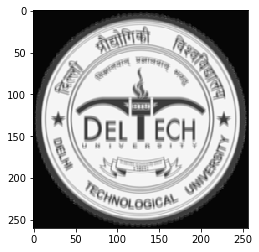

In [35]:
plt.imshow(signal.convolve2d(img_grey , np.array([g,g]).T) , cmap='gray')

What we see above is the same blur effect! this time in 2-D.

If we zoom in to a particular area we can see how it has been blured by our kernel. Let's first look at the original grey image.

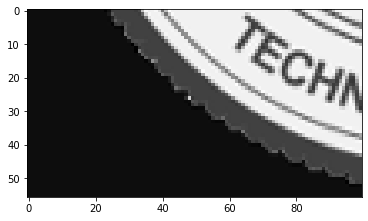

In [36]:
plt.imshow(img_grey[200: , 0:100], cmap='gray')

Now lets look at the convolved image

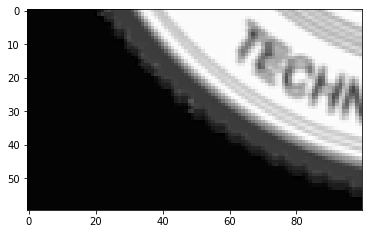

In [37]:
plt.imshow(signal.convolve2d(img_grey , np.array([g,g]).T)[200: , 0:100] , cmap='gray')

### Trying other kernels

In [38]:
def plotKernel(kernel , img):
    filtered = signal.convolve2d(img ,kernel )
    f, axarr = plt.subplots(2,2)
    f.set_figheight(8)
    f.set_figwidth(15)
    axarr[0,0].imshow(filtered , cmap='gray')
    axarr[0,1].imshow(img , cmap='gray')
    axarr[1,0].imshow(filtered[200: , 0:100] , cmap='gray')
    axarr[1,1].imshow(img_grey[200: , 0:100]  , cmap='gray')
    plt.show()


#### Shapening Kernel

\begin{bmatrix}
\ \ 0 & -1 & \ \ 0 \\
-1 & \ \ 5 & -1 \\
\ \ 0 & -1 & \ \ 0
\end{bmatrix}


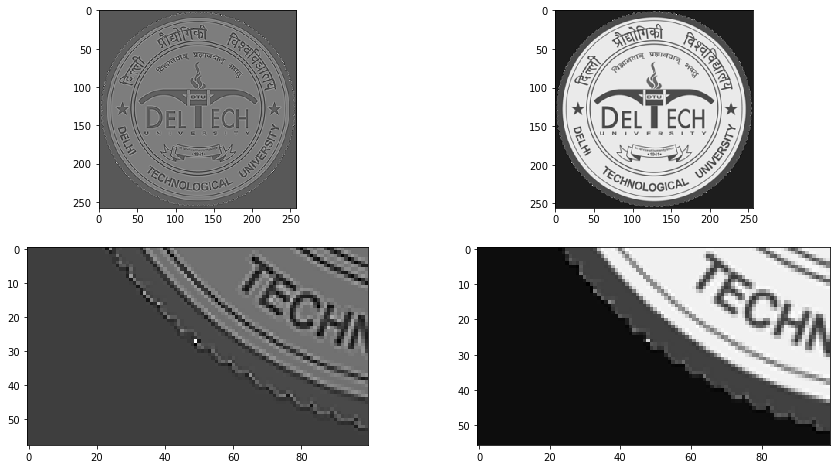

In [40]:
plotKernel(np.array([[0 , -1,0], [-1,5,-1] , [0,-1,0]]) , img_grey)

The left two images are the output and the right ones are the original gray scale images.

#### Emboss Kernel

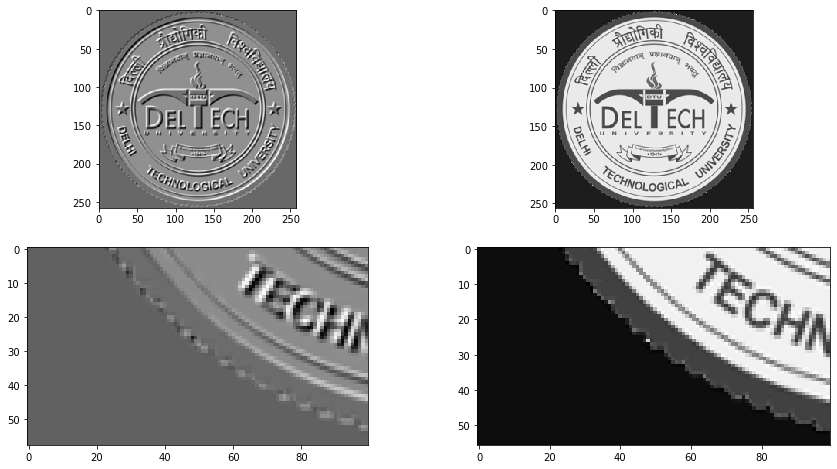

In [97]:
plotKernel(np.array([[-2,-1,0], [-1,1,1] , [0,1,2]]) , img_grey)

If we take the above kernel and just reverse the signs we get the opposite of Emboss! 

Image has been debossed!

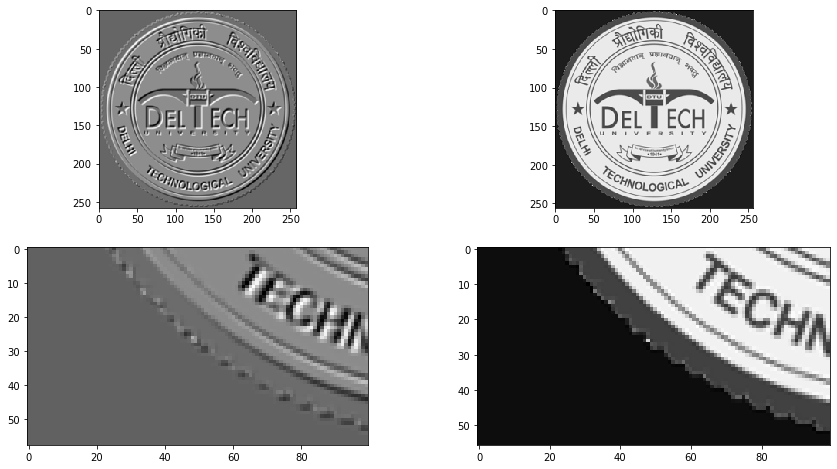

In [98]:
plotKernel(np.array([[2,1,0], [1,1,-1] , [0,-1,-2]]) , img_grey)